In [61]:
import os
import pandas as pd
from fastbook import *
from fastai.tabular.all import *
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from dtreeviz.trees import *
import sklearn

def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

togeth = pd.read_csv('C:/Users/jsult/Desktop/spacetitanic3/FINALtransferred/certainty_imputed_data',low_memory=False)


In [62]:
togeth = togeth.drop(columns = ['Unnamed: 0','train', 'VRDeck_Family.1','Spa_Family.1','RoomService_Family.1','FoodCourt_Family.1','ShoppingMall_Family.1',])
togeth = togeth.dropna(subset = 'Destination')
dest = togeth.Destination
togeth = togeth.drop(columns = 'Destination')
togeth['Destination'] = dest

In [ ]:
togeth = togeth[]

In [122]:
togeth = togeth[['HomePlanet', 'CryoSleep', 'Cabin', 'Age', 'VIP',
       'Group','GroupNumber','CabinSide','CabinDeck','CabinNum','Under18','Destination']]

In [123]:
splits = RandomSplitter(seed = 1)(range_of(togeth))
dep_var = 'Destination'
procs = [Categorify,FillMissing]
cont,cat = cont_cat_split(togeth,3, dep_var=dep_var)



In [125]:
cat

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'VIP',
 'CabinSide',
 'CabinDeck',
 'Under18']

In [126]:
togeth.Destination.value_counts()

Destination
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: count, dtype: int64

In [127]:
# Get the original categories for 'PassengerId'
original_passenger_ids = to.classes['PassengerId']

# Convert the 'PassengerId' column back to its original values
xs['PassengerId'] = xs['PassengerId'].map(lambda x: original_passenger_ids[x])

KeyError: 'PassengerId'

In [128]:
xs

,HomePlanet,CryoSleep,Cabin,VIP,CabinSide,CabinDeck,Under18,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,CabinNum_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,GroupNumber,CabinNum
8728,2,2,520,1,2,2,1,1,1,1,1,1,1,1,59.0,0.0,0.0,0.0,0.0,0.0,6254.0,2.0,243.0
1993,1,2,7994,1,2,7,1,1,1,1,1,1,1,1,38.0,0.0,0.0,0.0,0.0,0.0,1389.0,1.0,212.0
11381,1,1,7449,1,2,7,2,1,1,1,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,8157.0,5.0,1313.0
2754,1,1,5416,1,2,6,1,1,1,1,1,1,1,1,20.0,717.0,0.0,0.0,0.0,0.0,1941.0,1.0,370.0
11205,1,1,4362,1,2,6,1,1,1,1,1,1,1,1,35.0,0.0,0.0,62.0,0.0,891.0,8036.0,2.0,1537.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10063,2,1,580,1,2,2,1,1,1,1,1,1,1,1,33.0,0.0,3676.0,0.0,1743.0,1.0,7167.0,1.0,270.0
4843,1,1,8768,1,1,7,2,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,3476.0,2.0,571.0
5190,3,2,6123,1,2,6,1,1,1,1,1,1,1,1,40.0,0.0,0.0,0.0,0.0,0.0,3711.0,1.0,700.0
8325,1,1,3498,1,2,6,1,1,1,1,1,2,1,1,37.0,0.0,698.0,0.0,0.0,6.0,5969.0,2.0,1137.0


In [129]:
togeth[togeth.HomePlanet == 'Europa'].Destination.value_counts()

Destination
TRAPPIST-1e      1769
55 Cancri e      1341
PSO J318.5-22      29
Name: count, dtype: int64

In [130]:
togeth.loc[xs[xs.Cabin < 1500].index].HomePlanet.value_counts()

HomePlanet
Europa    2076
Earth       35
Mars        24
Name: count, dtype: int64

In [131]:
xs

,HomePlanet,CryoSleep,Cabin,VIP,CabinSide,CabinDeck,Under18,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,CabinNum_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,GroupNumber,CabinNum
8728,2,2,520,1,2,2,1,1,1,1,1,1,1,1,59.0,0.0,0.0,0.0,0.0,0.0,6254.0,2.0,243.0
1993,1,2,7994,1,2,7,1,1,1,1,1,1,1,1,38.0,0.0,0.0,0.0,0.0,0.0,1389.0,1.0,212.0
11381,1,1,7449,1,2,7,2,1,1,1,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,8157.0,5.0,1313.0
2754,1,1,5416,1,2,6,1,1,1,1,1,1,1,1,20.0,717.0,0.0,0.0,0.0,0.0,1941.0,1.0,370.0
11205,1,1,4362,1,2,6,1,1,1,1,1,1,1,1,35.0,0.0,0.0,62.0,0.0,891.0,8036.0,2.0,1537.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10063,2,1,580,1,2,2,1,1,1,1,1,1,1,1,33.0,0.0,3676.0,0.0,1743.0,1.0,7167.0,1.0,270.0
4843,1,1,8768,1,1,7,2,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,3476.0,2.0,571.0
5190,3,2,6123,1,2,6,1,1,1,1,1,1,1,1,40.0,0.0,0.0,0.0,0.0,0.0,3711.0,1.0,700.0
8325,1,1,3498,1,2,6,1,1,1,1,1,2,1,1,37.0,0.0,698.0,0.0,0.0,6.0,5969.0,2.0,1137.0


In [132]:
cat

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'VIP',
 'CabinSide',
 'CabinDeck',
 'Under18']

In [133]:
valid_y

7811     2
2122     2
1164     2
1874     1
9171     0
        ..
4276     2
4598     2
12680    1
9661     2
2703     2
Name: Destination, Length: 2539, dtype: int8

decision tree prediction 0.6872784560850729


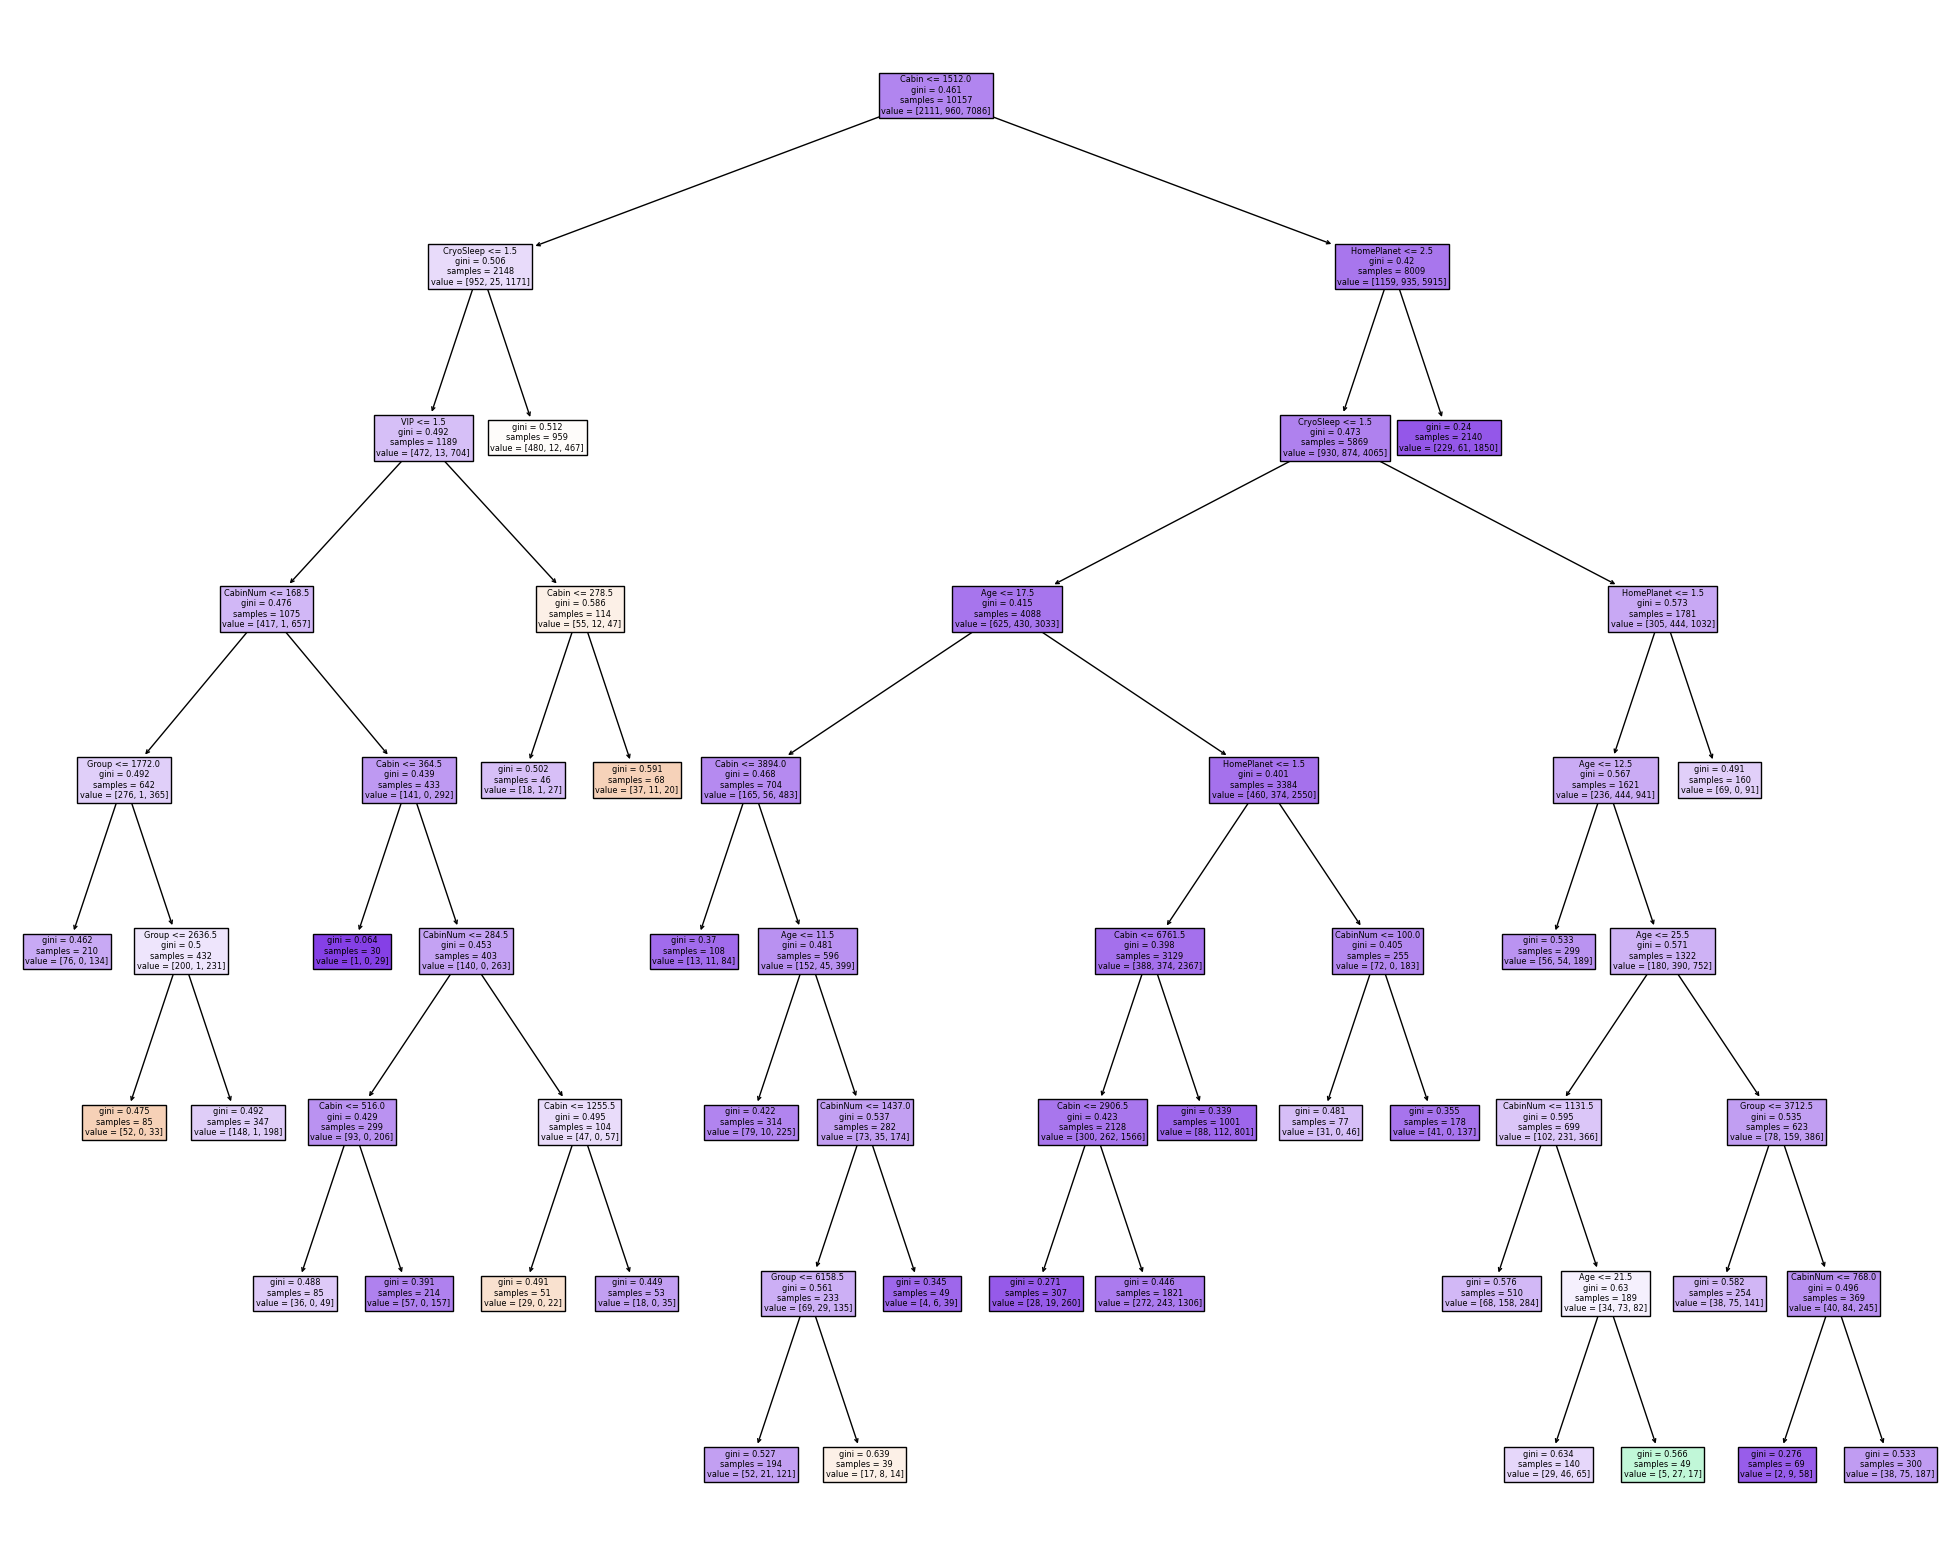

In [134]:
to = TabularPandas(togeth, procs, cat, cont, y_names=dep_var,splits = splits)

xs,y = to.train.xs,to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

m = DecisionTreeClassifier(max_leaf_nodes=30,min_samples_leaf= 30)
m.fit(xs, y)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(m,
                   feature_names= xs.columns,
                   filled=True)

print('decision tree prediction',((m.predict(valid_xs)) == valid_y).sum() / len(valid_y))